Problem Statement
Cryptocurrency markets are highly volatile, and liquidity plays a crucial role in market stability. Liquidity refers to
the ease with which assets can be bought or sold without significantly impacting the price. A lack of liquidity
can lead to increased price fluctuations and market instability.


You will use a dataset that includes historical cryptocurrency price and trading volume data from below link.
The dataset consists of records from 2016 and 2017.

dataset : https://drive.google.com/drive/folders/10BRgPip2Zj_56is3DilJCowjfyT6E9AM

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.statespace.sarimax import SARIMAX
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error


In [2]:
df = pd.read_csv(r"D:\flaskproject3\notebook\data\raw.csv")

In [3]:
df.head(5)

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16


In [4]:
df.dtypes

coin           object
symbol         object
price         float64
1h            float64
24h           float64
7d            float64
24h_volume    float64
mkt_cap       float64
date           object
dtype: object

In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   coin        500 non-null    object        
 1   symbol      500 non-null    object        
 2   price       500 non-null    float64       
 3   1h          497 non-null    float64       
 4   24h         497 non-null    float64       
 5   7d          497 non-null    float64       
 6   24h_volume  497 non-null    float64       
 7   mkt_cap     500 non-null    float64       
 8   date        500 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 35.3+ KB


In [7]:
df.isnull().sum()

coin          0
symbol        0
price         0
1h            3
24h           3
7d            3
24h_volume    3
mkt_cap       0
date          0
dtype: int64

In [8]:
df.fillna(method='ffill', inplace=True)

In [9]:
df.isnull().sum()

coin          0
symbol        0
price         0
1h            0
24h           0
7d            0
24h_volume    0
mkt_cap       0
date          0
dtype: int64

In [10]:
df.describe()

,price,1h,24h,7d,24h_volume,mkt_cap,date
count,5.000000e+02,500.000000,500.000000,500.000000,5.000000e+02,5.000000e+02,500
mean,6.527851e+02,0.018742,0.028828,0.038906,3.257027e+08,3.722677e+09,2022-03-16 00:00:00
min,1.544000e-09,-0.039000,-0.141000,-0.547000,0.000000e+00,6.577043e+07,2022-03-16 00:00:00
25%,1.904625e-01,0.011000,0.004750,-0.019250,1.737409e+06,1.146391e+08,2022-03-16 00:00:00
50%,1.085000e+00,0.018000,0.021500,0.006000,8.514632e+06,2.083208e+08,2022-03-16 00:00:00
75%,6.925000e+00,0.026000,0.040000,0.049250,4.049320e+07,5.845642e+08,2022-03-16 00:00:00
max,4.121727e+04,0.086000,0.573000,2.935000,5.793497e+10,7.709915e+11,2022-03-16 00:00:00
std,4.578529e+03,0.013842,0.057900,0.203092,3.172784e+09,3.784349e+10,NaN


In [11]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']


In [12]:
categorical_features

['coin', 'symbol']

In [13]:
numeric_features

['price', '1h', '24h', '7d', '24h_volume', 'mkt_cap', 'date']

### 3.8 Adding columns 

In [14]:

df['moving_average'] = df['price'].rolling(window=5).mean()
df['volatility'] = df['price'].rolling(window=5).std()
df['liquidity_ratio'] = df['24h_volume'] / df['mkt_cap'] 

In [15]:
df.head(5)

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date,moving_average,volatility,liquidity_ratio
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16,NaN,NaN,0.045903
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16,NaN,NaN,0.060374
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16,NaN,NaN,0.724503
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16,NaN,NaN,0.021795
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16,8797.859975,17959.416594,0.074150


 Univariate Analysis (Single variable at a time)

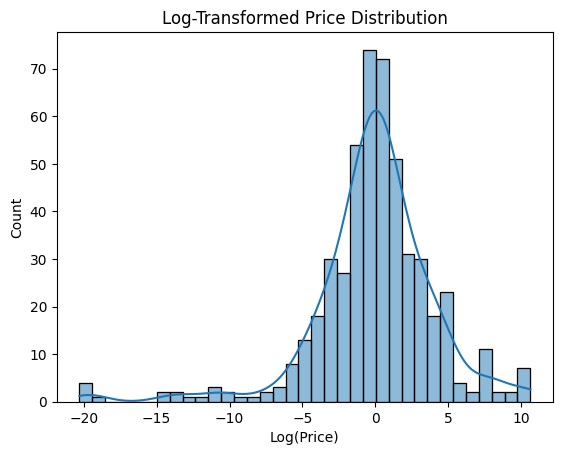

In [16]:
df = df[df['price'] > 0]
df['log_price'] = np.log(df['price'])

sns.histplot(df['log_price'], kde=True)
plt.title('Log-Transformed Price Distribution')
plt.xlabel('Log(Price)')
plt.show()

Bivariate analysis

<Axes: xlabel='price', ylabel='24h_volume'>

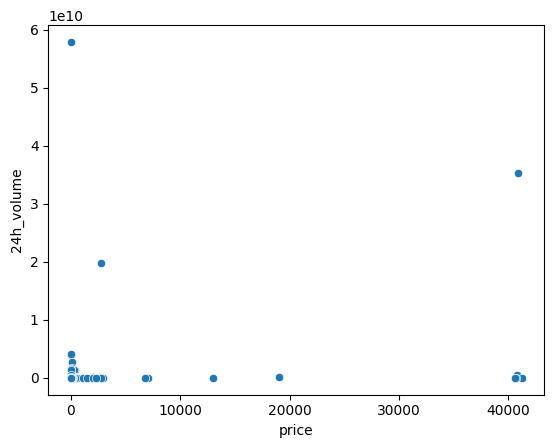

In [17]:
sns.scatterplot(x = 'price',y = '24h_volume' , data = df ,palette= 'Set2')

In [18]:
correlation = df.corr(numeric_only=True)

In [19]:
correlation

,price,1h,24h,7d,24h_volume,mkt_cap,moving_average,volatility,liquidity_ratio,log_price
price,1.000000,0.011248,0.001956,0.025324,0.195442,0.368096,0.424183,0.423049,-0.030977,0.347549
1h,0.011248,1.000000,0.322915,0.152966,-0.043965,0.006486,0.012669,0.010834,0.045557,0.043457
24h,0.001956,0.322915,1.000000,0.441872,-0.012027,-0.003647,0.037479,0.038472,0.285211,0.037089
7d,0.025324,0.152966,0.441872,1.000000,0.009223,0.003780,0.017270,0.015086,0.468759,0.074106
24h_volume,0.195442,-0.043965,-0.012027,0.009223,1.000000,0.644004,0.098313,0.090819,0.083087,0.091604
mkt_cap,0.368096,0.006486,-0.003647,0.003780,0.644004,1.000000,0.172042,0.163874,-0.005272,0.152202
moving_average,0.424183,0.012669,0.037479,0.017270,0.098313,0.172042,1.000000,0.999221,-0.046058,0.138253
volatility,0.423049,0.010834,0.038472,0.015086,0.090819,0.163874,0.999221,1.000000,-0.045492,0.133861
liquidity_ratio,-0.030977,0.045557,0.285211,0.468759,0.083087,-0.005272,-0.046058,-0.045492,1.000000,-0.024488
log_price,0.347549,0.043457,0.037089,0.074106,0.091604,0.152202,0.138253,0.133861,-0.024488,1.000000


Text(0.5, 1.0, 'correlation between numeric_features')

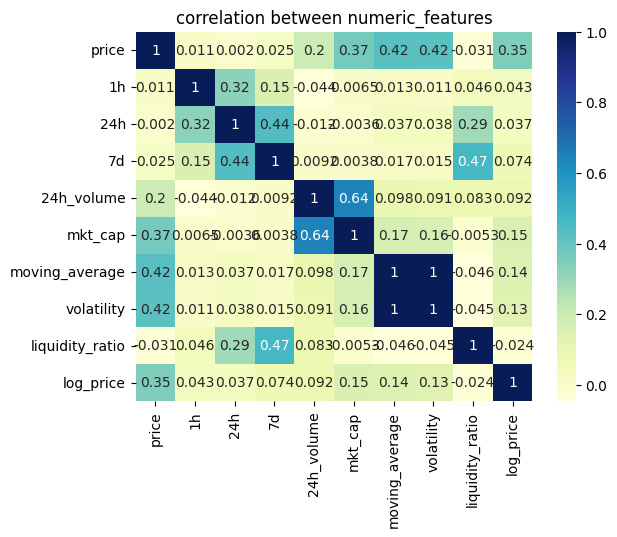

In [20]:
sns.heatmap(correlation,annot=True,cmap="YlGnBu")
plt.title("correlation between numeric_features")

Insights:
See which features are strongly correlated (+ or -).moving_average & volatility with price
Coins with larger market caps generally have higher trading volumes — shows market activity scale.24h_volume & mkt_cap
Price correlates with its recent average, which is expected.price & moving_average
Higher-priced coins tend to be more volatile — shows risk-return behavior.price & volatility
As expected — log transform retains correlation with original values.log_price & price



Multivariate analysis

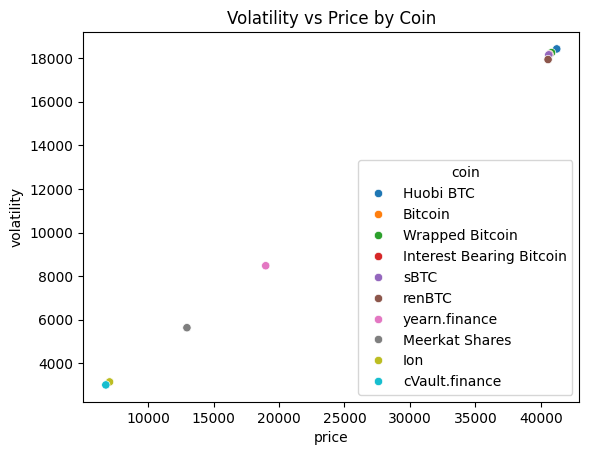

In [21]:
top10_df = df.nlargest(10, 'price')

sns.scatterplot(x = 'price', y = 'volatility', hue = 'coin',data = top10_df)
plt.title("Volatility vs Price by Coin")
plt.show()

Insights:

Detect clusters of coins with similar behavior.
Identify outliers 
See if higher price leads to higher volatility

Regression/LM plot (e.g., linear relationship with hue):

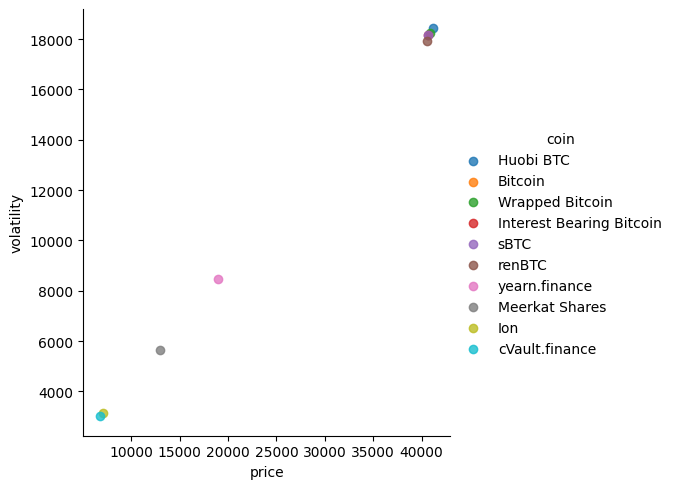

In [22]:
sns.lmplot(x='price', y='volatility', data=top10_df, hue='coin', fit_reg=True)

plt.legend().remove()

Insights:
Measure linear correlation (positive, negative, none).

Understand how strongly one variable predicts another.

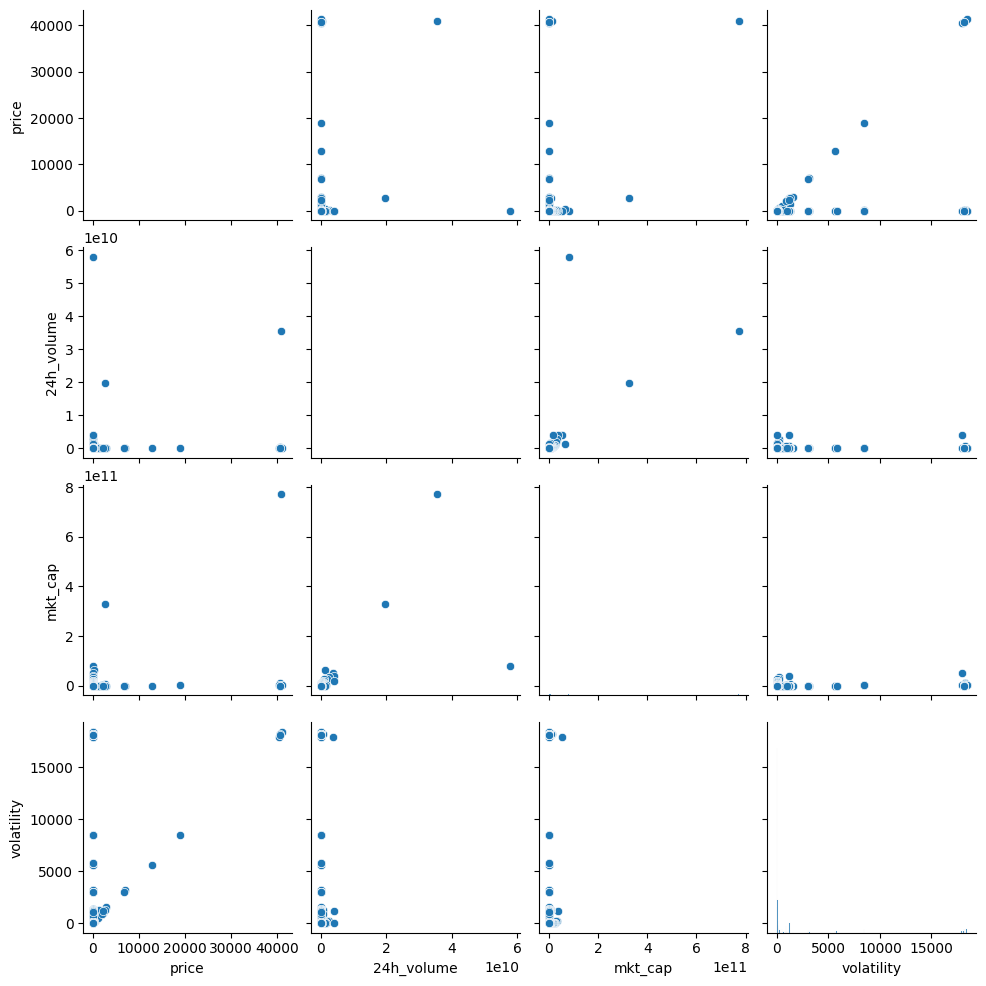

In [23]:
plt.rcParams['figure.figsize'] = (30, 12)
sns.pairplot(df[['price','24h_volume', 'mkt_cap', 'volatility']])